**Project (Dalal & Triggs, CVPR 2005 – HOG human detection)**

Navneet Dalal and Bill Triggs introduced a robust human detection method using densely sampled Histograms of Oriented Gradients (HOG) combined with a linear SVM. Their approach, featuring overlapping block normalization, achieved nearly perfect results on the MIT pedestrian dataset and state‑of‑the‑art accuracy on a newly collected INRIA human dataset.
We can find its pre-trained model in **HOGDescriptor_getDefaultPeopleDetector** at OpenCV library

**Dataset (INRIA Human Dataset)**

To evaluate and advance detection methods, the authors released the INRIA dataset: over 1,800 annotated images of pedestrians in varied poses and complex backgrounds, providing a much more challenging benchmark than prior data

In [28]:
import cv2
import matplotlib.pyplot as plt
import numpy as  np

In [2]:
#First we will Create a HOGDescriptor object and then we will pass the pre-trained model for people detector 
#Then we will pass that people detector ro SVM detector of our SVM
#Therefore, HOG will extract features with a pyramid of multiple runs, Finally we will aggregate our data together and will pass it to SVM for classification which wil
#finish our Object Detection process
hog = cv2.HOGDescriptor()
people_svm_detector = cv2.HOGDescriptor_getDefaultPeopleDetector()
hog.setSVMDetector(people_svm_detector)

In [54]:
pedestrians = cv2.imread("images/Beatles_-_Abbey_Road.jpg")

#Detect pedestrians from picture with hog and svm detector
#scale will be used for pyramid scale
(bounding_boxes , weights) = hog.detectMultiScale(img= pedestrians, winStride=(1,1), scale= 1.0125)

print("detected objects count: ", len(bounding_boxes))
print("weights: ", weights)
print("bounding boxes: ", bounding_boxes)

detected objects count:  3
weights:  [1.00179587 0.22989746 0.29954397]
bounding boxes:  [[ 86 147  69 138]
 [153 151  70 141]
 [224 148  68 137]]


**Bounding Box drawing with opencv for our detected objects**

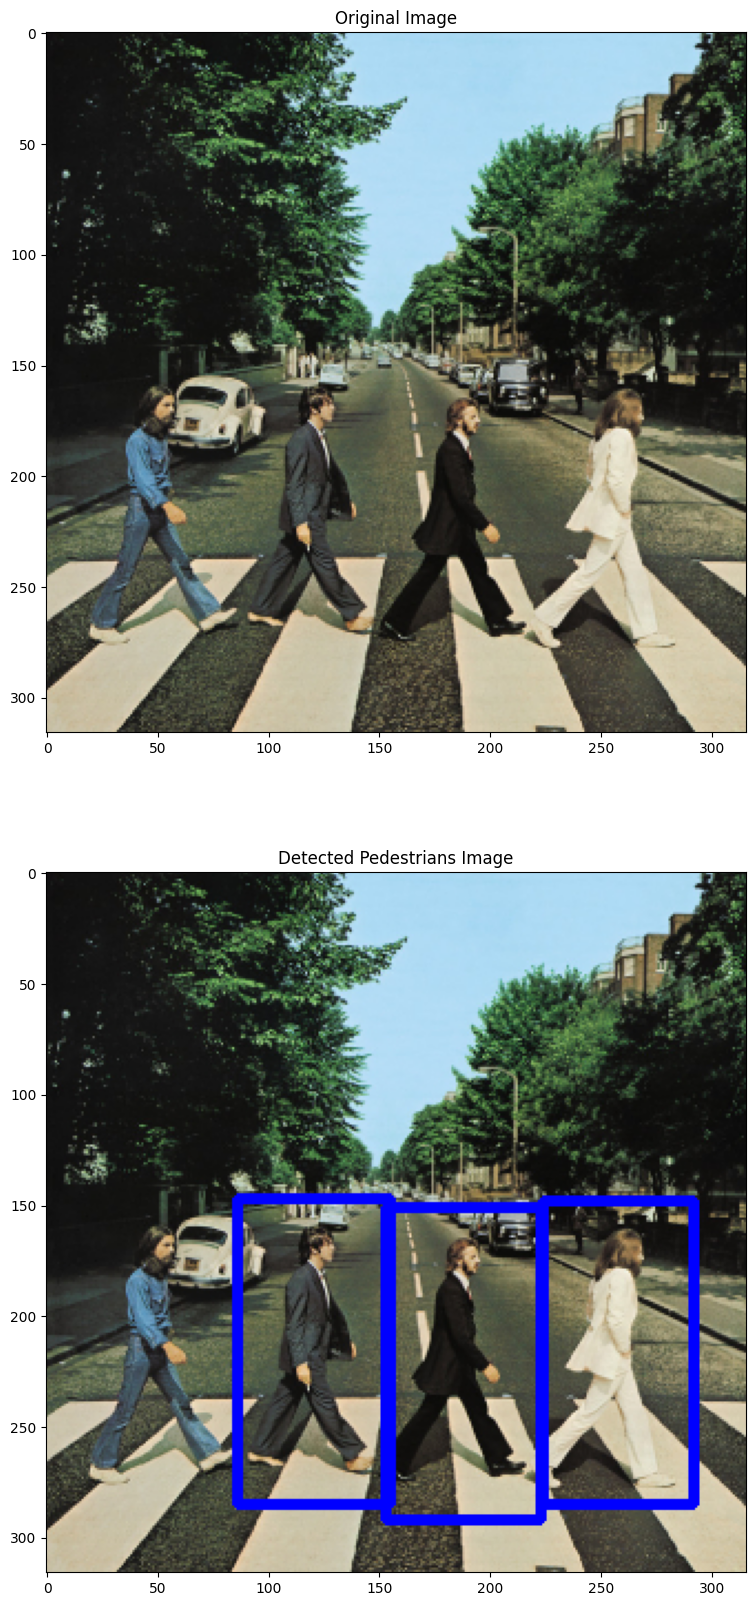

In [55]:
detected_image = pedestrians.copy()

for (x, y, w, h) in bounding_boxes: 
    cv2.rectangle(
        img=detected_image, 
        pt1= (x, y),  
        pt2=(x + w, y + h),  
        color=(255, 0, 0), 
        thickness=4)
    
plt.figure(figsize=(20,20))

plt.subplot(2,1,1); plt.imshow(pedestrians[:,:,::-1]);plt.title("Original Image");

plt.subplot(2,1,2); plt.imshow(detected_image[:,:,::-1]);plt.title("Detected Pedestrians Image");


## HOG has not found George Harrison :/ 
It may stems from the fact that this old object detection algorithm are not reliable and efficient for complex problems and that why they are replaced with Deep Learning and Convolution Neural Networks